# Credit Screening


Los bancos comerciales reciben muchas solicitudes de tarjetas de crédito. Muchos de ellos son rechazados por muchas razones, como saldos elevados de préstamos, bajos niveles de ingresos o demasiadas consultas sobre el informe crediticio de una persona, por ejemplo. El análisis manual de estas aplicaciones es mundano, propenso a errores y requiere mucho tiempo (¡y el tiempo es dinero!). Afortunadamente, esta tarea se puede automatizar con el poder del aprendizaje automático y prácticamente todos los bancos comerciales lo hacen hoy en día. En este cuaderno, construiremos un predictor automático de aprobación de tarjetas de crédito utilizando técnicas de aprendizaje automático, tal como lo hacen los bancos reales.


Este archivo se refiere a las solicitudes de tarjetas de crédito. Todos los nombres y valores de los atributos se han cambiado a símbolos sin sentido para proteger la confidencialidad de los datos.

Este conjunto de datos es interesante porque hay una buena combinación de atributos: continuo, nominal con una pequeña cantidad de valores y nominal con una gran cantidad de valores. También hay algunos valores perdidos.

### Importing Libraries

In [76]:
# Librerias de Manipulacion, transformacion y visualizacion de Datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Algorithm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


# Setting matplotlib and warnings
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

### Loading Data and Preview

In [39]:
# Cargando cunjunto de datos
df = pd.read_csv("credit-screening.data", header = None)

# Inspect data
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


El resultado puede parecer un poco confuso a primera vista, pero intentemos descubrir las características más importantes de una solicitud de tarjeta de crédito. Las funciones de este conjunto de datos se han anonimizado para proteger la privacidad, pero este blog nos brinda una descripción general bastante buena de las funciones probables. Las características probables en una solicitud típica de tarjeta de crédito son Género, Edad, Deuda, Casado, Cliente bancario, Nivel de educación, Etnicidad, Años de empleo, Incumplimiento anterior, Empleado, Puntaje crediticio, Licencia de conducir, Ciudadano, Código postal, Ingresos y, finalmente, Estado de aprobación. Esto nos brinda un buen punto de partida y podemos mapear estas características con respecto a las columnas en la salida.

Como podemos ver desde nuestro primer vistazo a los datos, el conjunto de datos tiene una mezcla de características numéricas y no numéricas. Esto se puede solucionar con un preprocesamiento, pero antes de hacerlo, aprendamos un poco más sobre el conjunto de datos para ver si hay otros problemas del conjunto de datos que deben solucionarse.

In [40]:
# Para mostrarlo mas parecido a la realidad que bien pueden ser las cracteristicas.
columnas = ['Genero', 'Edad', 'Deuda', 'Casado', 'Cliente', 'Nivel_educación', 'Etnicidad', 'Años_empleado', 'Incumplimiento', 'Empleado', 'Puntaje', 'Licencia_conducir', 'Ciudadano', 'Código_postal', 'Ingresos', 'aprobacion']

df.columns = columnas

df.head()

,Genero,Edad,Deuda,Casado,Cliente,Nivel_educación,Etnicidad,Años_empleado,Incumplimiento,Empleado,Puntaje,Licencia_conducir,Ciudadano,Código_postal,Ingresos,aprobacion
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Exploratory Analysis to know variables and check for values NA


In [14]:
# informaciones de conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Genero             690 non-null    object 
 1   Edad               690 non-null    object 
 2   Deuda              690 non-null    float64
 3   Casado             690 non-null    object 
 4   Cliente            690 non-null    object 
 5   Nivel_educación    690 non-null    object 
 6   Etnicidad          690 non-null    object 
 7   Años_empleado      690 non-null    float64
 8   Incumplimiento     690 non-null    object 
 9   Empleado           690 non-null    object 
 10  Puntaje            690 non-null    int64  
 11  Licencia_conducir  690 non-null    object 
 12  Ciudadano          690 non-null    object 
 13  Código_postal      690 non-null    object 
 14  Ingresos           690 non-null    int64  
 15  aprobacion         690 non-null    object 
dtypes: float64(2), int64(2), o

##### Funtion for values NA

In [33]:
def missing_values(df):
    #Let's create a dataframe, round the results, and name the columns
    df_missing_count = df.isnull().sum().reset_index().rename(columns={'index':'column_name', 0:'missing_count'})
    #Create a dataframe calculating percentage
    missing_percnt = df.isnull().sum() * 100 / df.shape[0] #df.shape[0] will give us the number of lines
    #Let's create a dataframe, round the results, and name the columns
    df_missing_percnt = pd.DataFrame(missing_percnt).round(2).reset_index().rename(columns={
                        'index':'column_name', 0:'missing_values(%)'})
   
    df = df_missing_count.merge(df_missing_percnt, how = 'inner', left_on = 'column_name', right_on = 'column_name')
    df = df.sort_values(by = 'missing_values(%)',ascending = False)
    return df

#### Checking for missing values

In [34]:
missing_values(df)

,column_name,missing_count,missing_values(%)
0,Genero,0,0.0
1,Edad,0,0.0
2,Deuda,0,0.0
3,Casado,0,0.0
4,Cliente,0,0.0
5,Nivel_educación,0,0.0
6,Etnicidad,0,0.0
7,Años_empleado,0,0.0
8,Incumplimiento,0,0.0
9,Empleado,0,0.0


In [22]:
#Resumen estadistico variables numericas
df.select_dtypes(include=['float64','int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Deuda,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
Años_empleado,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
Puntaje,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Ingresos,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


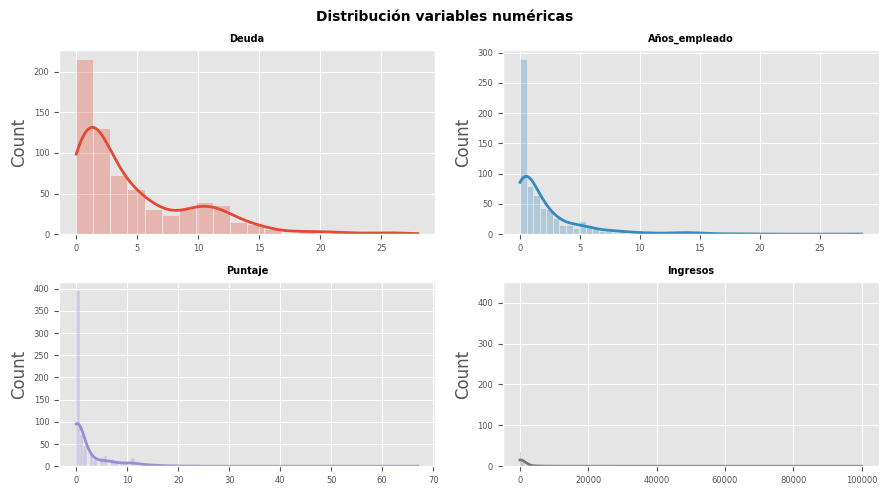

In [75]:
# Gráfico para cada variables numericas

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['int64','float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
     
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [52]:
#Resumen estadistico variables categoricas
df.select_dtypes(include=['object']).describe().T


,count,unique,top,freq
Genero,690,3,b,468
Edad,690,350,?,12
Casado,690,4,u,519
Cliente,690,4,g,519
Nivel_educación,690,15,c,137
Etnicidad,690,10,v,399
Incumplimiento,690,2,t,361
Empleado,690,2,f,395
Licencia_conducir,690,2,f,374
Ciudadano,690,3,g,625


El conjunto de datos no tiene valores faltantes como tal pero si inconsistencias, las cuales nos ocuparemos en esta tarea. Las inconsistencia en el conjunto de datos están etiquetados con '?', que se puede ver en el resultado en la columna de edad donde este caracter se repite 12 veces y por esta razon validamos que este patro no se repite en todo el conjunto de datos y reemplacemos temporalmente estos signos de interrogación de valor faltante con NaN.

In [65]:
#Validacion
df.isin(['?']).sum().sort_values().tail(7).to_frame("Signo ?")

,Signo ?
Casado,6
Cliente,6
Nivel_educación,9
Etnicidad,9
Genero,12
Edad,12
Código_postal,13


Observamos que tenemos este patron en 7 columnas por lo que lo reemplazacemos por NaN

In [73]:
#Reemplazando los "?" a Nan con numpy para posteriormente utilizar una tenica de imputacion y corregir.

df = df.replace('?', np.NaN)

# Imputamos los valores faltante con la tecnica del que mas se repite debido a que se tratan de colunmas categoricas
for col in df:
    # Check if the column is of object type
    #Validamos que la columna es tipo objecto o categorica
    if df[col].dtypes == 'object':
        # imputamos con el valor que mas se repite en cada columna
        df = df.fillna(df[col].value_counts().index[0])

# Contamos la cantidad de  NaNs en el conjunto de dato e imprimimos para verificar
df.isnull().sum().sort_values().to_frame("NaN")

,NaN
Genero,0
Edad,0
Deuda,0
Casado,0
Cliente,0
Nivel_educación,0
Etnicidad,0
Años_empleado,0
Incumplimiento,0
Empleado,0


Una pregunta importante que surge aquí es ¿por qué le damos tanta importancia a los valores faltantes? ¿No pueden simplemente ser ignorados? Ignorar los valores faltantes puede afectar en gran medida el rendimiento de un modelo de aprendizaje automático. Al ignorar los valores faltantes, nuestro modelo de aprendizaje automático puede perder información sobre el conjunto de datos que puede ser útil para su entrenamiento. 

<AxesSubplot: xlabel='aprobacion', ylabel='Count'>

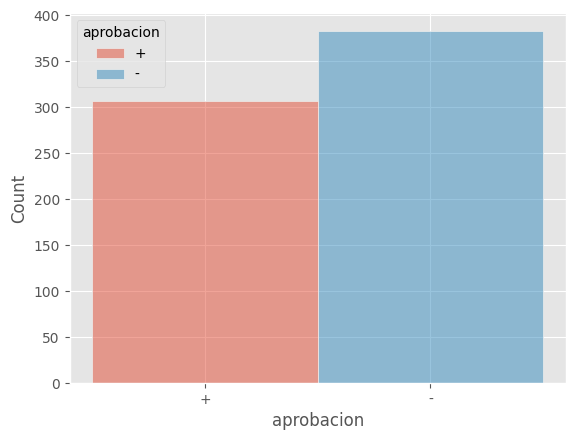

In [32]:
#Distribucion o frecuencia de la variable repuesta, se observa una buena distribucion.
sns.histplot(x= 'aprobacion' ,hue ='aprobacion', stat = 'count',  data = df)

### Splitting the dataset into train and test sets

In [ ]:
# Eliminamos las caracteristicas 11 and 13 ('Licencia_conducir', 'Código_postal')
#df = df.drop(columns = ['Licencia_conducir', 'Código_postal']) 


## Working on it